In [19]:
# deskripsi library yang digunakan

In [20]:
import pandas as pd

#library untuk visualisasi
import matplotlib.pyplot as plt

#library untuk analisis time series
from statsmodels.tsa.seasonal import seasonal_decompose

#library untuk forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# memanggil dataset

In [21]:
df = pd.read_excel('BBRI.xlsx')
df['date'] = pd.to_datetime(df['date'])

In [22]:
# Menampilkan seluruh data dalam bentuk tabel
print(df)

# Menghitung total jumlah data
total_data = len(df)
print(f'Total Jumlah Data: {total_data}')

          date  close
0   2020-05-29   2950
1   2020-06-02   3180
2   2020-06-03   3100
3   2020-06-04   3060
4   2020-06-05   3110
..         ...    ...
725 2023-05-19   5400
726 2023-05-22   5425
727 2023-05-23   5500
728 2023-05-24   5600
729 2023-05-25   5475

[730 rows x 2 columns]
Total Jumlah Data: 730


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    730 non-null    datetime64[ns]
 1   close   730 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


# transform data

In [24]:
df.set_index(['date'], inplace=True)

In [25]:
df.head(10)  # Ini akan menampilkan 10 baris pertama dari DataFrame

,close
date,
2020-05-29,2950
2020-06-02,3180
2020-06-03,3100
2020-06-04,3060
2020-06-05,3110
2020-06-08,3300
2020-06-09,3210
2020-06-10,3030
2020-06-11,2970


In [26]:
df.index.min(), df.index.max()

(Timestamp('2020-05-29 00:00:00'), Timestamp('2023-05-25 00:00:00'))

In [27]:
# Ubah frekuensi indeks waktu dari 'D' ke 'B'
df = df.asfreq('B')

# Sekarang, Anda dapat mengatur frekuensi indeks waktu ke 'B'
df.index.freq = 'B'

# analisa time series

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return

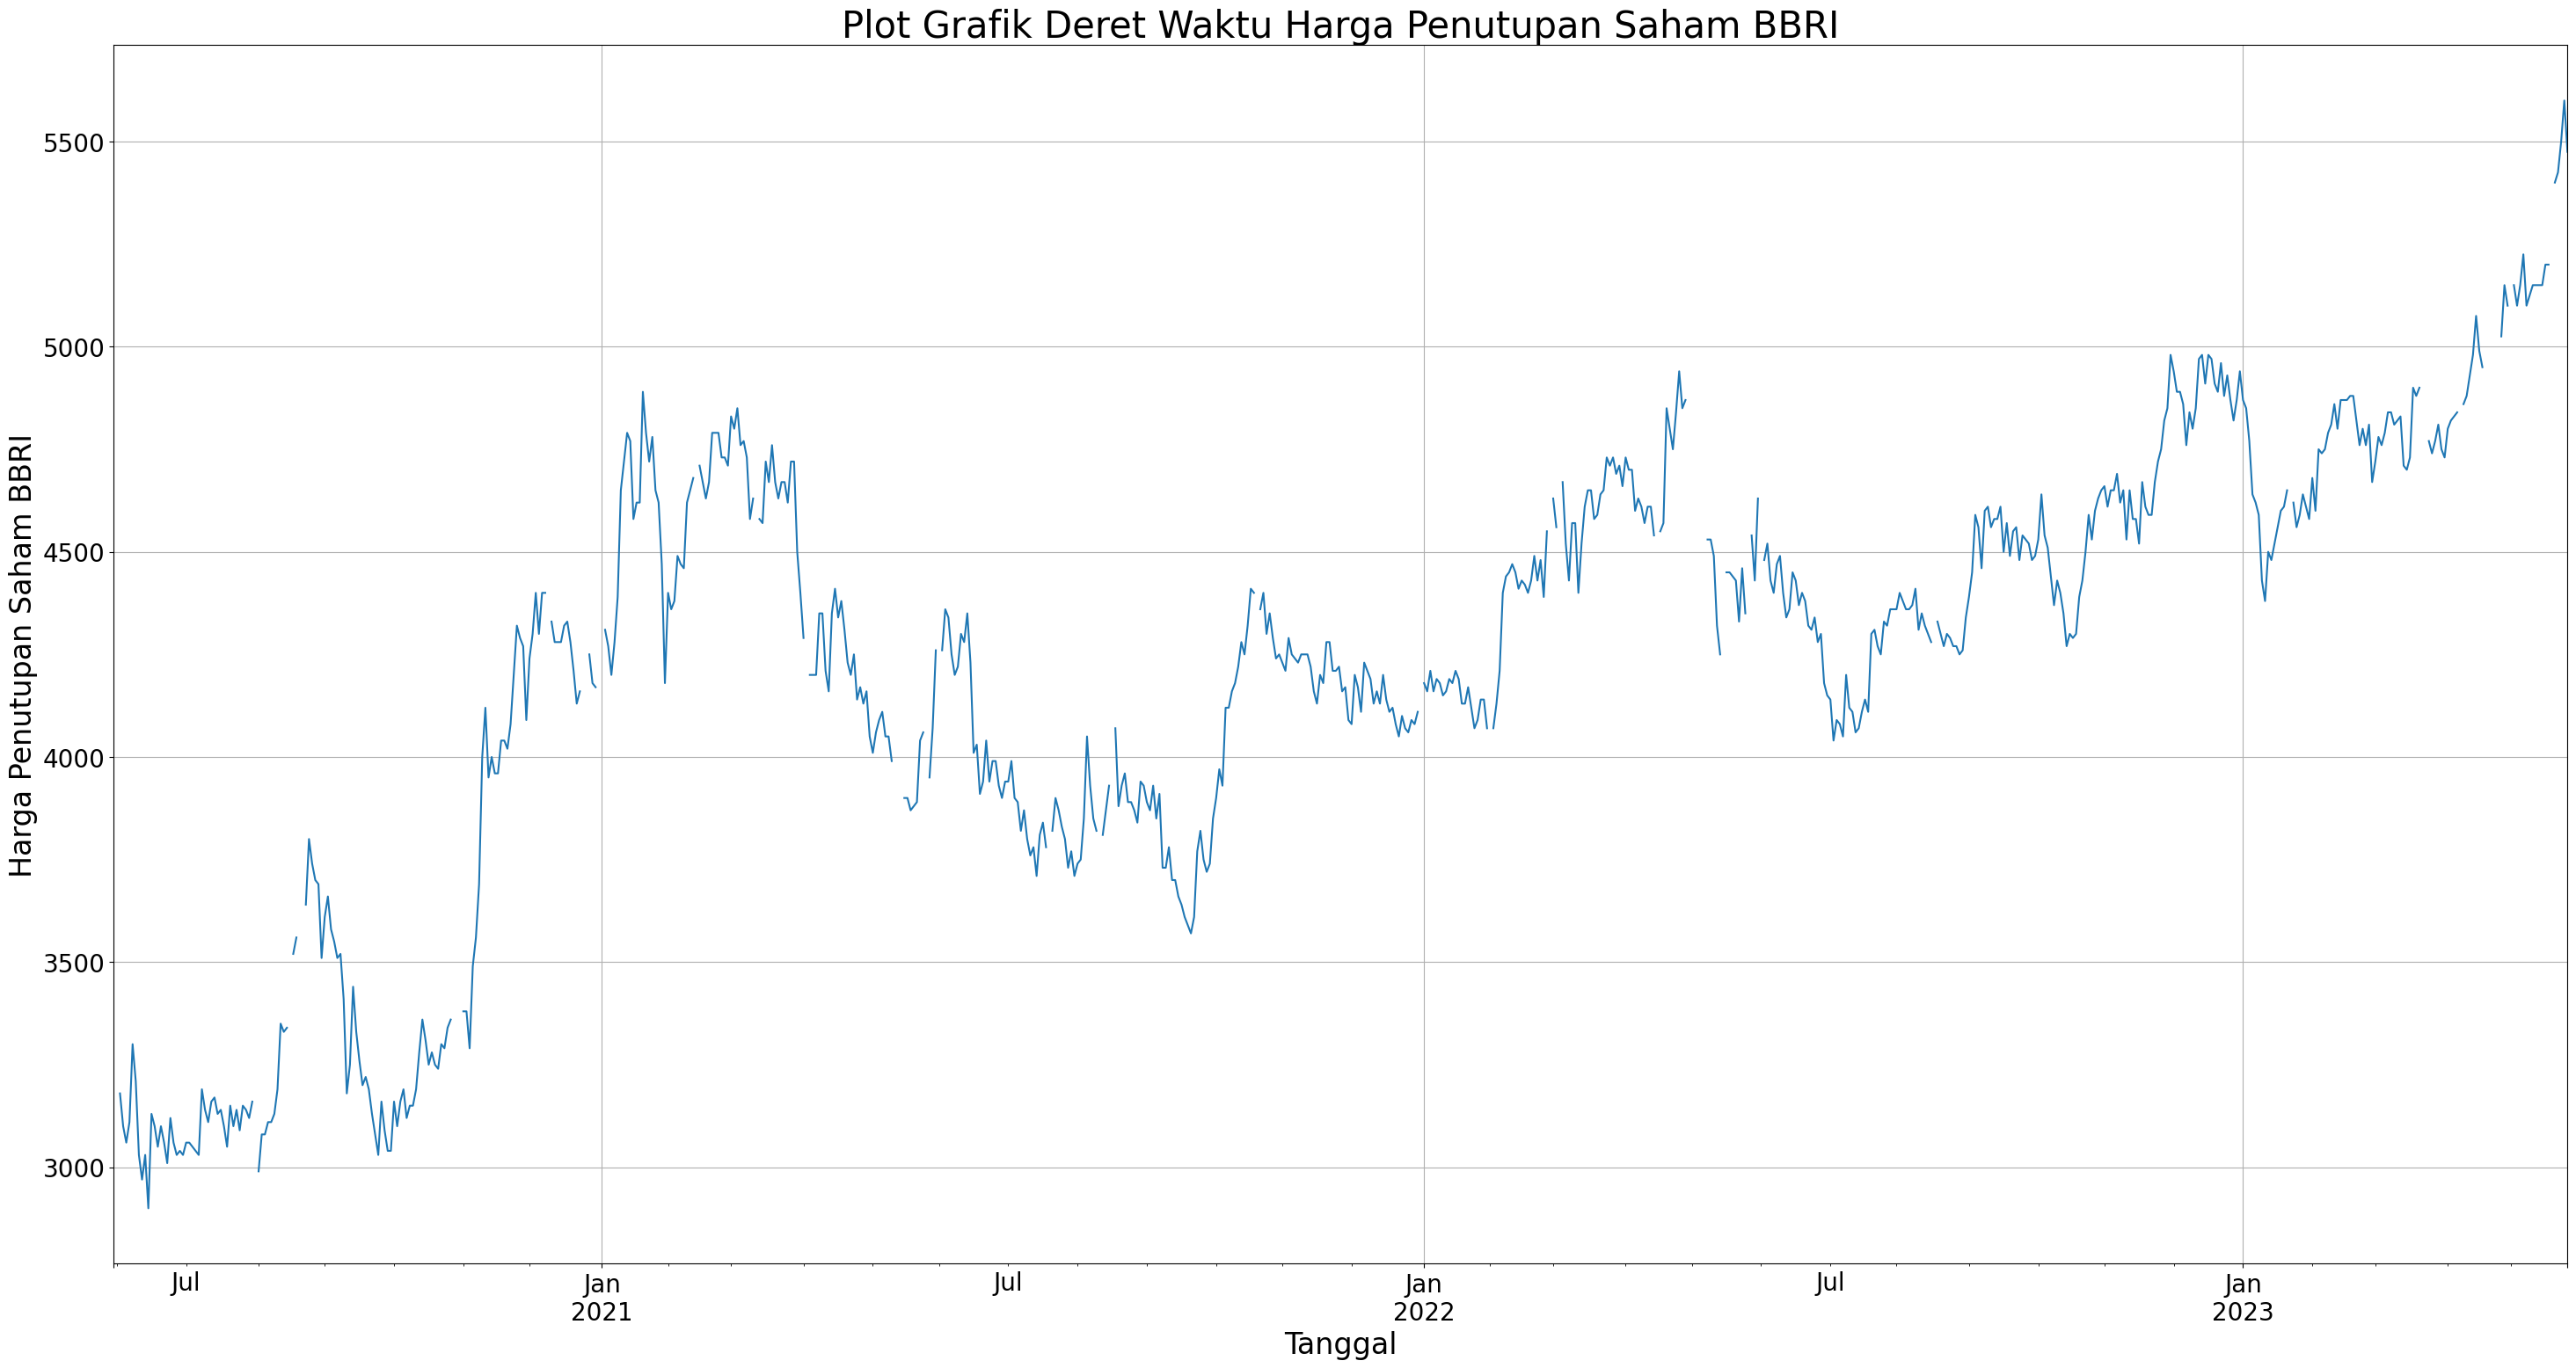

In [28]:
# Mengatur ukuran grafik
plt.figure(figsize=(36, 18))

# Plot deret waktu harga penutupan saham BBRI
df['close'].plot(grid=True)

# Menambahkan judul
plt.title('Plot Grafik Deret Waktu Harga Penutupan Saham BBRI', fontsize=30)

# Menambahkan label sumbu x dan sumbu y
plt.ylabel('Harga Penutupan Saham BBRI', fontsize=24)
plt.xlabel('Tanggal', fontsize=24)

# Mengatur ukuran font untuk nilai-nilai di sumbu x dan sumbu y
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Menampilkan grafik
plt.show()

In [29]:
train_df = df.loc['2020-05-29':'2022-12-30']
test_df = df.loc['2023-01-02':'2023-05-25']

In [30]:
df['close'].fillna(method='ffill', inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_20620\3832295341.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['close'].fillna(method='ffill', inplace=True)


C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return

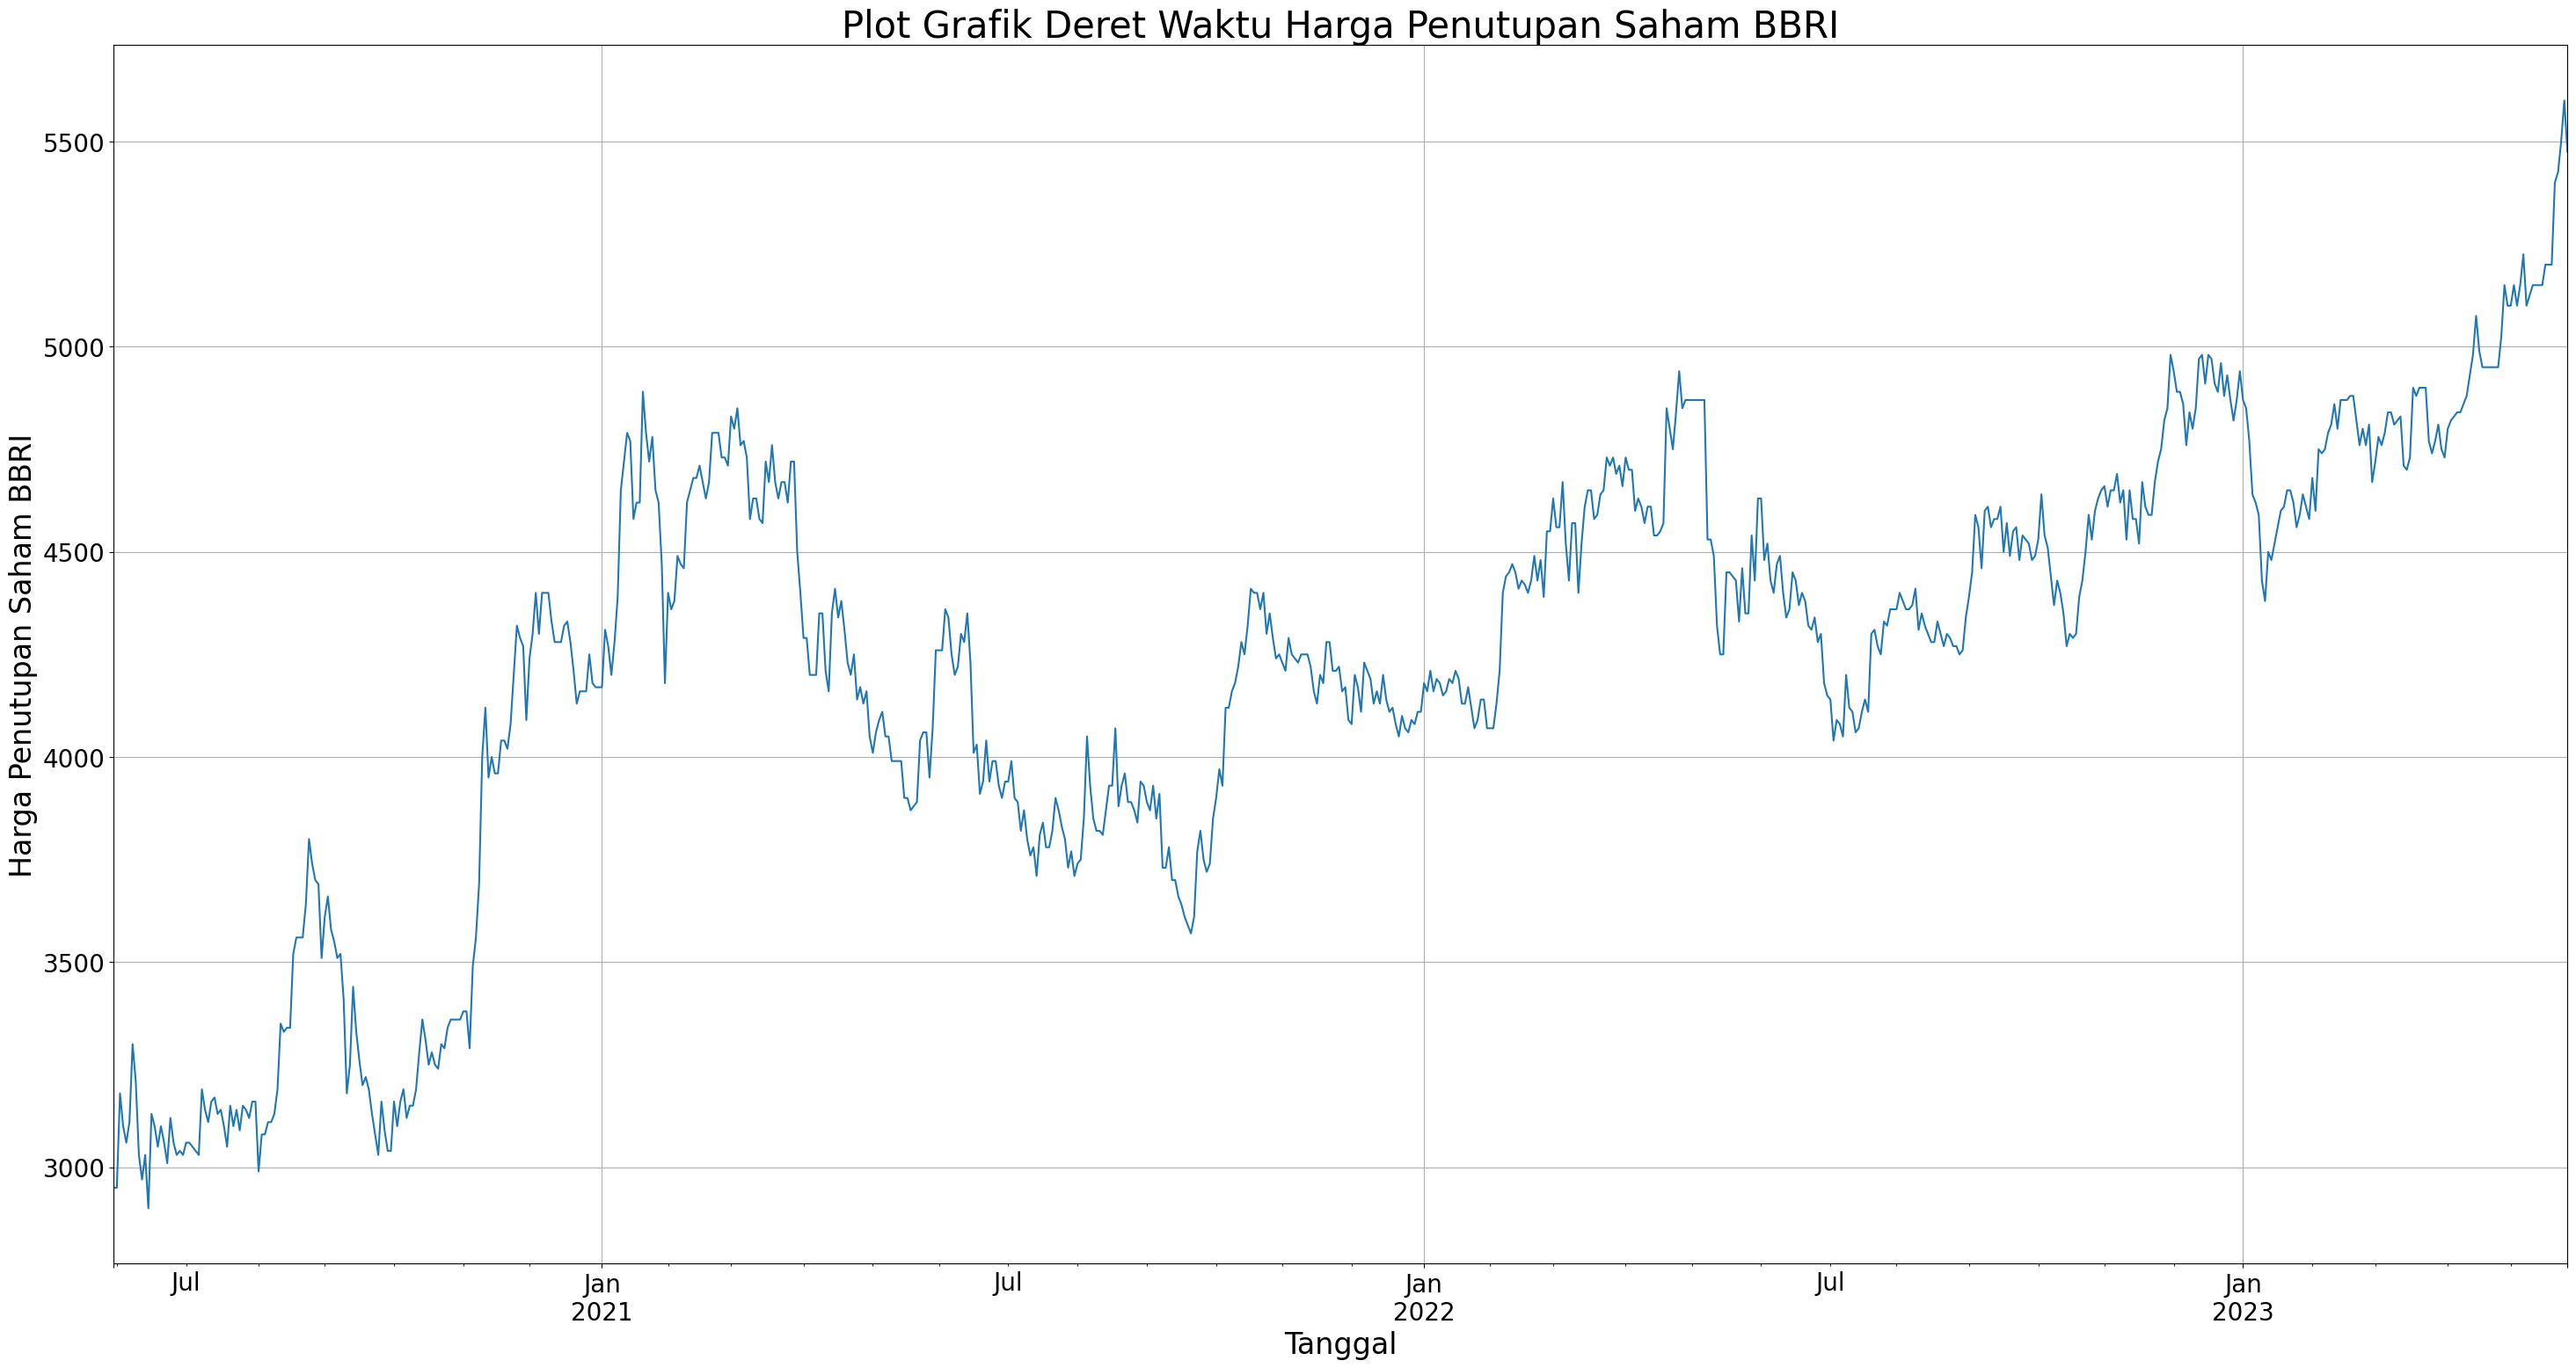

In [31]:
# Mengatur ukuran grafik
plt.figure(figsize=(36, 18))

# Plot deret waktu harga penutupan saham BBRI
df['close'].plot(grid=True)

# Menambahkan judul
plt.title('Plot Grafik Deret Waktu Harga Penutupan Saham BBRI', fontsize=30)

# Menambahkan label sumbu x dan sumbu y
plt.ylabel('Harga Penutupan Saham BBRI', fontsize=24)
plt.xlabel('Tanggal', fontsize=24)

# Mengatur ukuran font untuk nilai-nilai di sumbu x dan sumbu y
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Menampilkan grafik
plt.show()

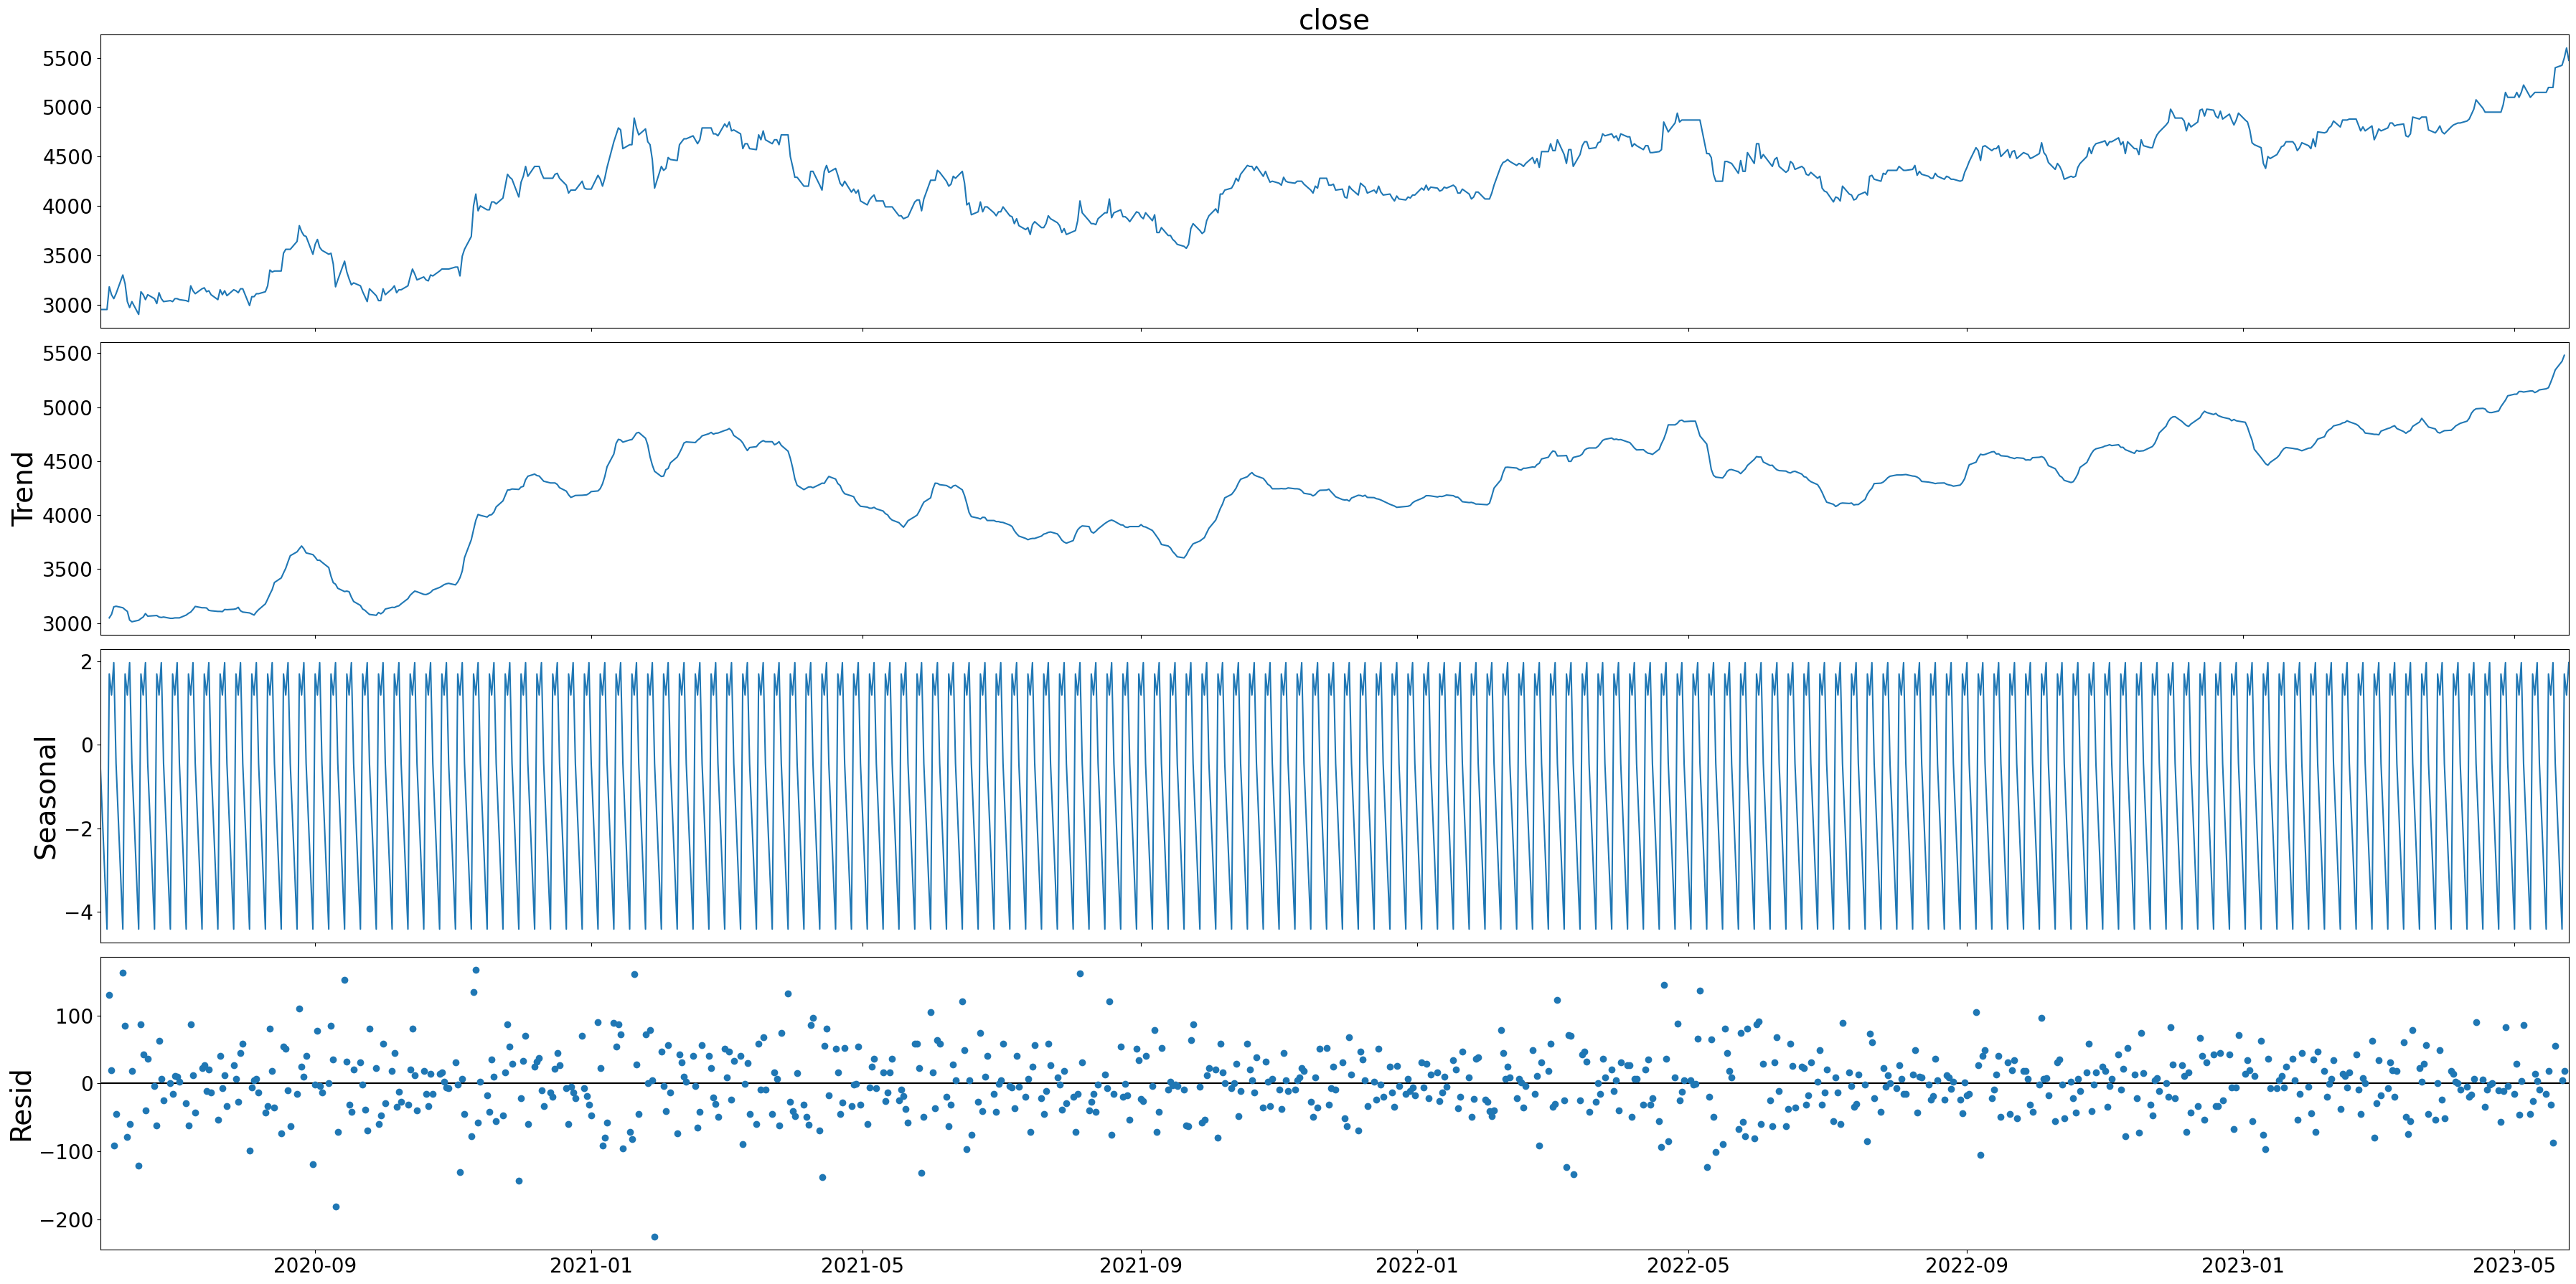

In [32]:
# Set the figsize for all plots
plt.rcParams["figure.figsize"] = (36, 18)

# Perform decomposition
decompose_add = seasonal_decompose(df['close'])

# Modify the fontsize for title and labels
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', titlesize=28, labelsize=28)  # Customize title and label fontsize

# Plot the decomposition
decompose_add.plot()

# Show the plot
plt.show()


# Triple Exponential Smoothing

In [33]:
# best_alpha = None
# best_beta = None
# best_gamma = None
# best_seasonal_period = None
# best_mse = float('inf')  
# best_mape = float('inf')  # Inisialisasi dengan nilai MAPE yang sangat tinggi

# # Loop melalui semua kombinasi alpha, beta, gamma, dan seasonal_period untuk evaluasi model
# alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# betas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# seasonal_periods = list(range(300, 310))


# results = []  # Daftar untuk menyimpan semua hasil kombinasi

# # ...
# import matplotlib.pyplot as plt

# # ...

# for alpha in alphas:
#     for beta in betas:
#         for gamma in gammas:
#             for seasonal_period in seasonal_periods:
#                 model = ExponentialSmoothing(train_df['close'], seasonal='add', seasonal_periods=seasonal_period)
#                 model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
                
#                 # Buat DataFrame tanggal prediksi untuk data pengujian
#                 prediksi = model_fit.forecast(len(test_df))
                
#                 # Hitung MSE (Mean Squared Error) untuk model ini
#                 mse = mean_squared_error(test_df['close'], prediksi)
                
#                 # Hitung MAPE untuk model ini
#                 mape = mean_absolute_percentage_error(test_df['close'], prediksi) / test_df['close'].mean() * 100
                
#                 result = {
#                     'Alpha': alpha,
#                     'Beta': beta,
#                     'Gamma': gamma,
#                     'Seasonal Period': seasonal_period,
#                     'MSE': mse,
#                     'MAPE': mape
#                 }
#                 results.append(result)
                
#                 # Periksa apakah MSE dan MAPE saat ini lebih baik daripada yang terbaik sejauh ini
#                 if mse < best_mse and mape < best_mape:
#                     best_alpha = alpha
#                     best_beta = beta
#                     best_gamma = gamma
#                     best_seasonal_period = seasonal_period
#                     best_mse = mse
#                     best_mape = mape
                
#                 # # Simpan grafik hasil prediksi dalam file
#                 # plt.figure()
#                 # plt.plot(test_df.index, test_df['close'], label='Actual')
#                 # plt.plot(test_df.index, prediksi, label='Forecast', color='red')
#                 # plt.xlabel('Date')
#                 # plt.ylabel('Closing Price')
#                 # plt.title('Harga Saham BBRI Forecasting')
#                 # plt.legend()
#                 # plt.grid(True)
#                 # plt.savefig(f'percobaan_190_310/forecast_{alpha}_{beta}_{gamma}_{seasonal_period}.png')
#                 # plt.close()

# # ...

# # Simpan semua hasil dalam file Excel (XLSX)
# results_df = pd.DataFrame(results)
# results_df.to_excel('hasil_model', index=False)

# # Tampilkan hasil terbaik
# print(f"Alpha Terbaik: {best_alpha}")
# print(f"Beta Terbaik: {best_beta}")
# print(f"Gamma Terbaik: {best_gamma}")
# print(f"Seasonal Period Terbaik: {best_seasonal_period}")
# print(f"RMSE Terbaik: {best_mse}")
# print(f"MAPE Terbaik: {best_mape}%")


C:\Users\acer\AppData\Local\Temp\ipykernel_20620\3070323850.py:9: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


20 Hasil Prediksi Awal:
2023-01-02    4881.885158
2023-01-03    4881.427481
2023-01-04    4844.097972
2023-01-05    4817.332255
2023-01-06    4815.980712
2023-01-09    4769.774871
2023-01-10    4650.709871
2023-01-11    4679.278636
2023-01-12    4756.013231
2023-01-13    4671.001551
2023-01-16    4620.312181
2023-01-17    4623.646797
2023-01-18    4620.998548
2023-01-19    4653.736782
2023-01-20    4619.691526
2023-01-23    4555.395549
2023-01-24    4526.303091
2023-01-25    4592.406237
2023-01-26    4525.190744
2023-01-27    4502.200633
Freq: B, dtype: float64
Mean Squared Error (MSE): 30039.7462447942
Mean Absolute Percentage Error (MAPE): 0.0303918014306006


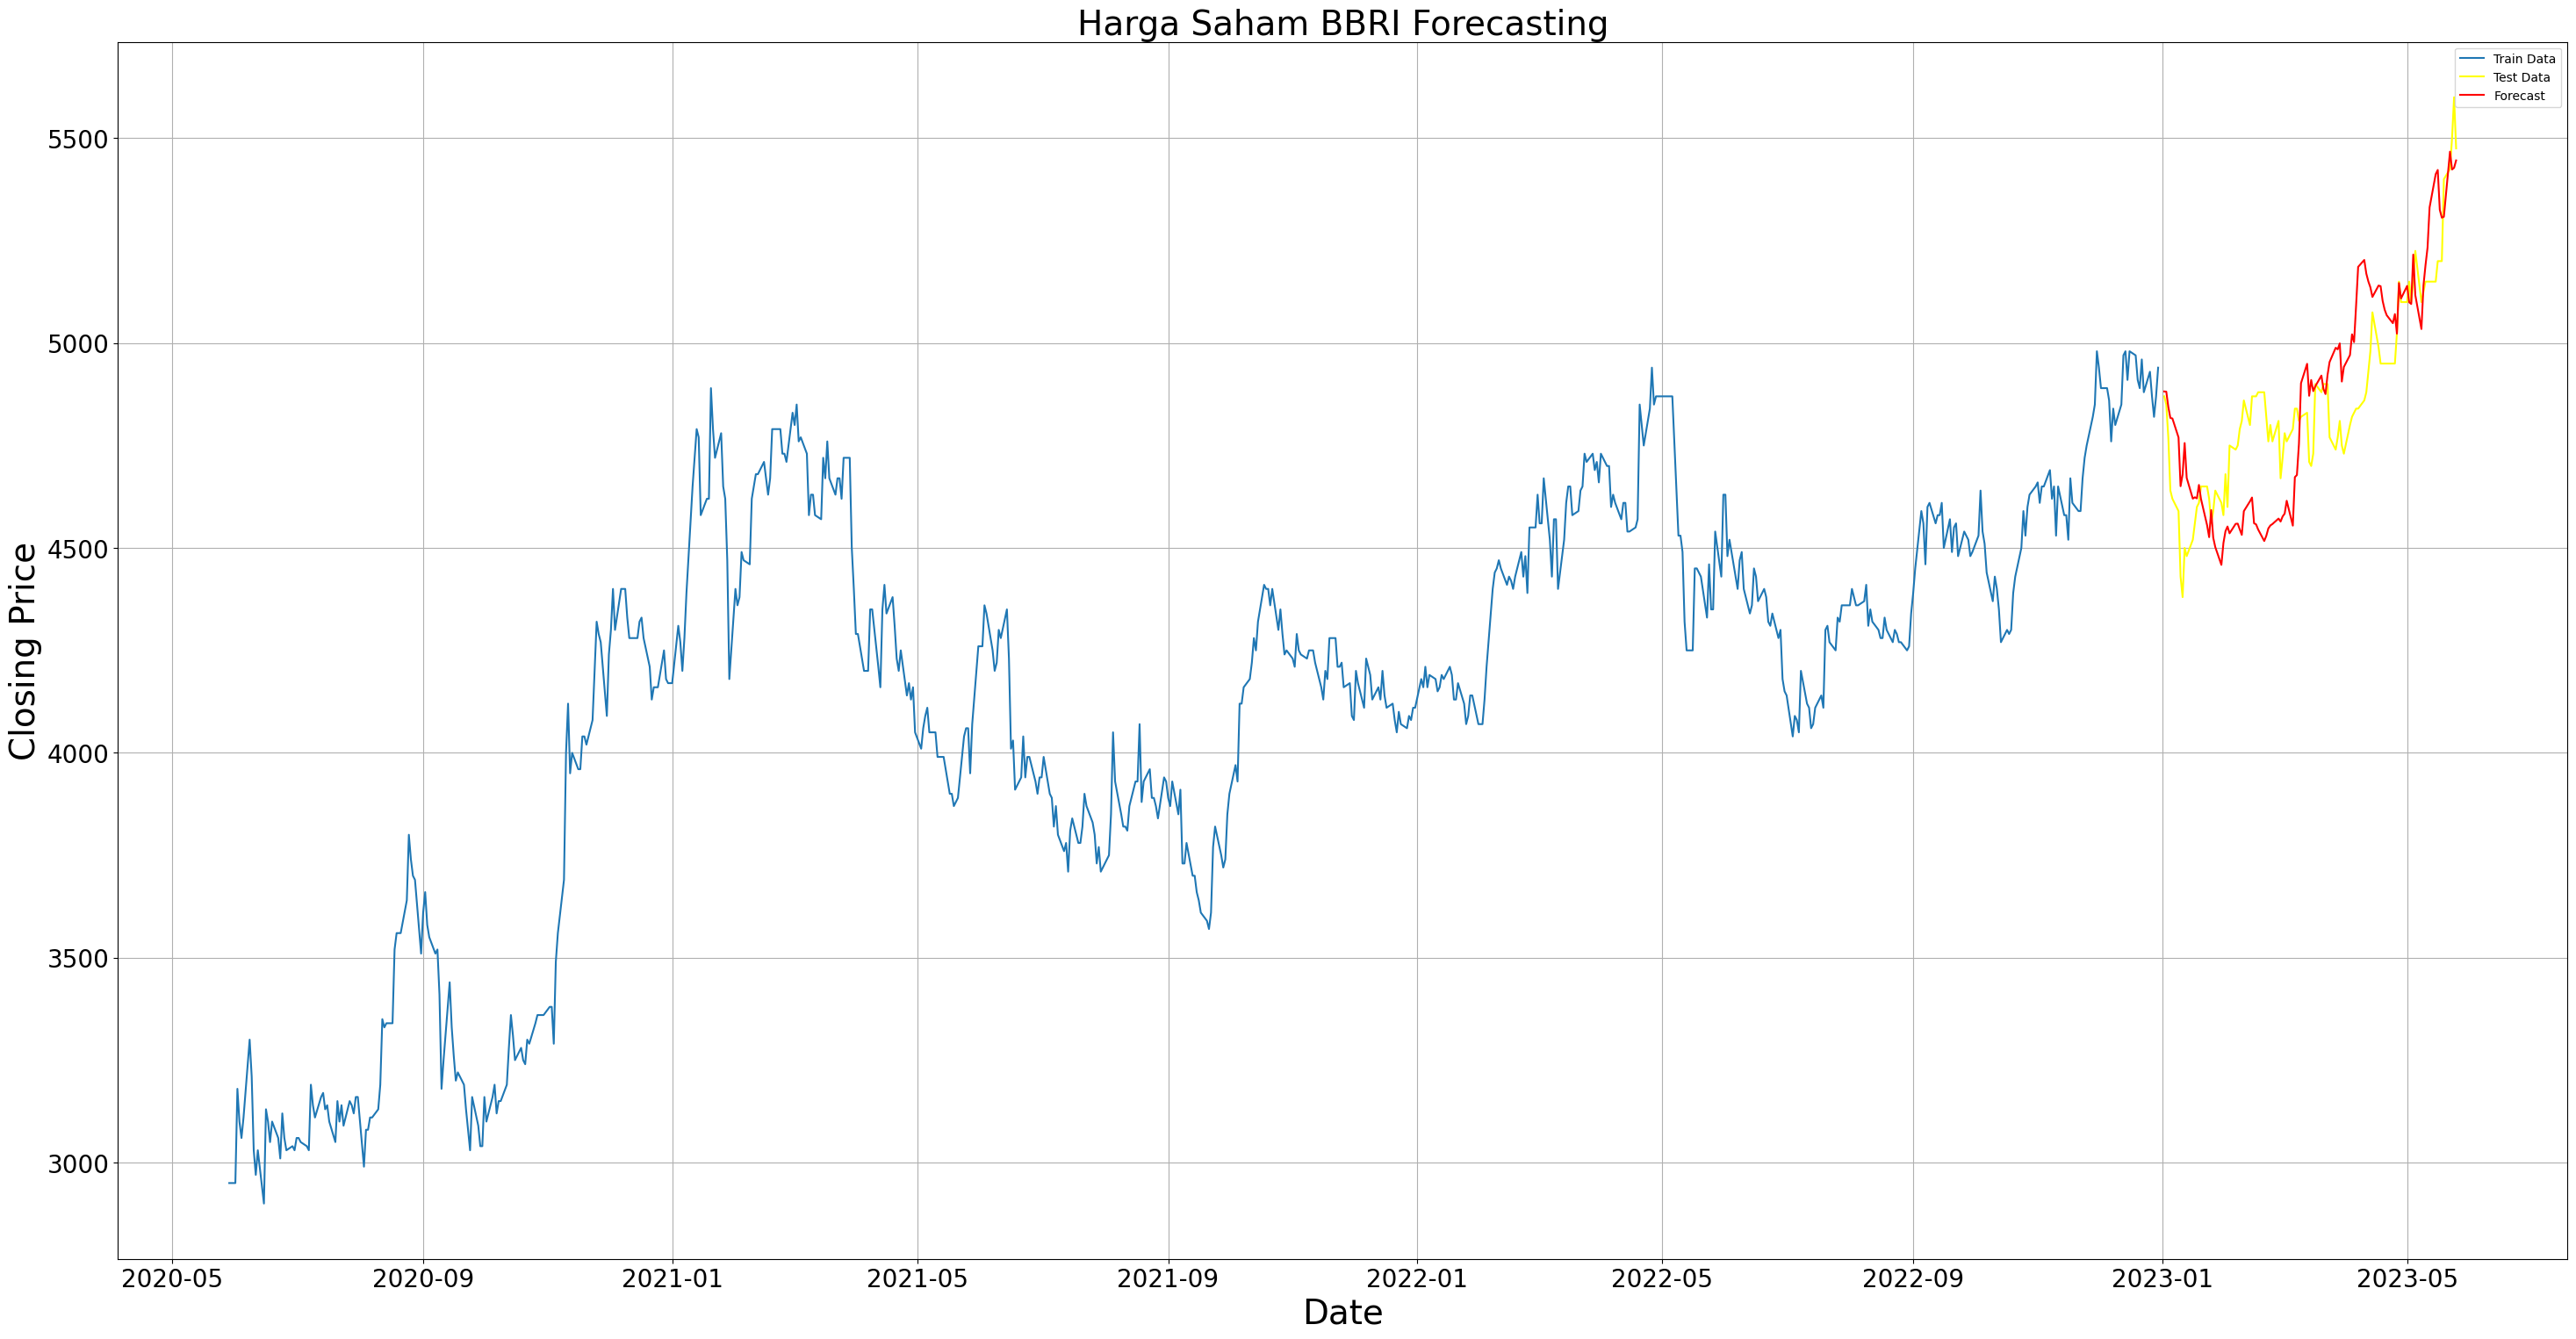

In [34]:
# Tentukan parameter alpha, beta, dan gamma
alpha = 0.3
beta = 0.1
gamma = 0.1
seasonal_period = 304

# Membuat model Triple Exponential Smoothing
model = ExponentialSmoothing(train_df['close'], seasonal='add', seasonal_periods=seasonal_period)
model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Buat prediksi untuk tanggal yang diminta
forecast = model_fit.forecast(len(test_df))

# Buat prediksi untuk 20 periode awal
forecast_initial = model_fit.forecast(steps=20)

# Tampilkan hasil prediksi 20 periode awal
print("20 Hasil Prediksi Awal:")
print(forecast_initial)

# Hitung metrik evaluasi (MSE dan MAPE)
mse = mean_squared_error(test_df['close'], forecast)
mape = mean_absolute_percentage_error(test_df['close'], forecast)

# Tampilkan metrik evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# Plot hasil forecast
plt.figure(figsize=(36, 18))
plt.plot(train_df.index, train_df['close'], label='Train Data')
plt.plot(test_df.index, test_df['close'], label='Test Data', color='yellow')
plt.plot(test_df.index, forecast, label='Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Harga Saham BBRI Forecasting')
plt.legend()
plt.grid(True)



C:\Users\acer\AppData\Local\Temp\ipykernel_20620\97438077.py:14: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


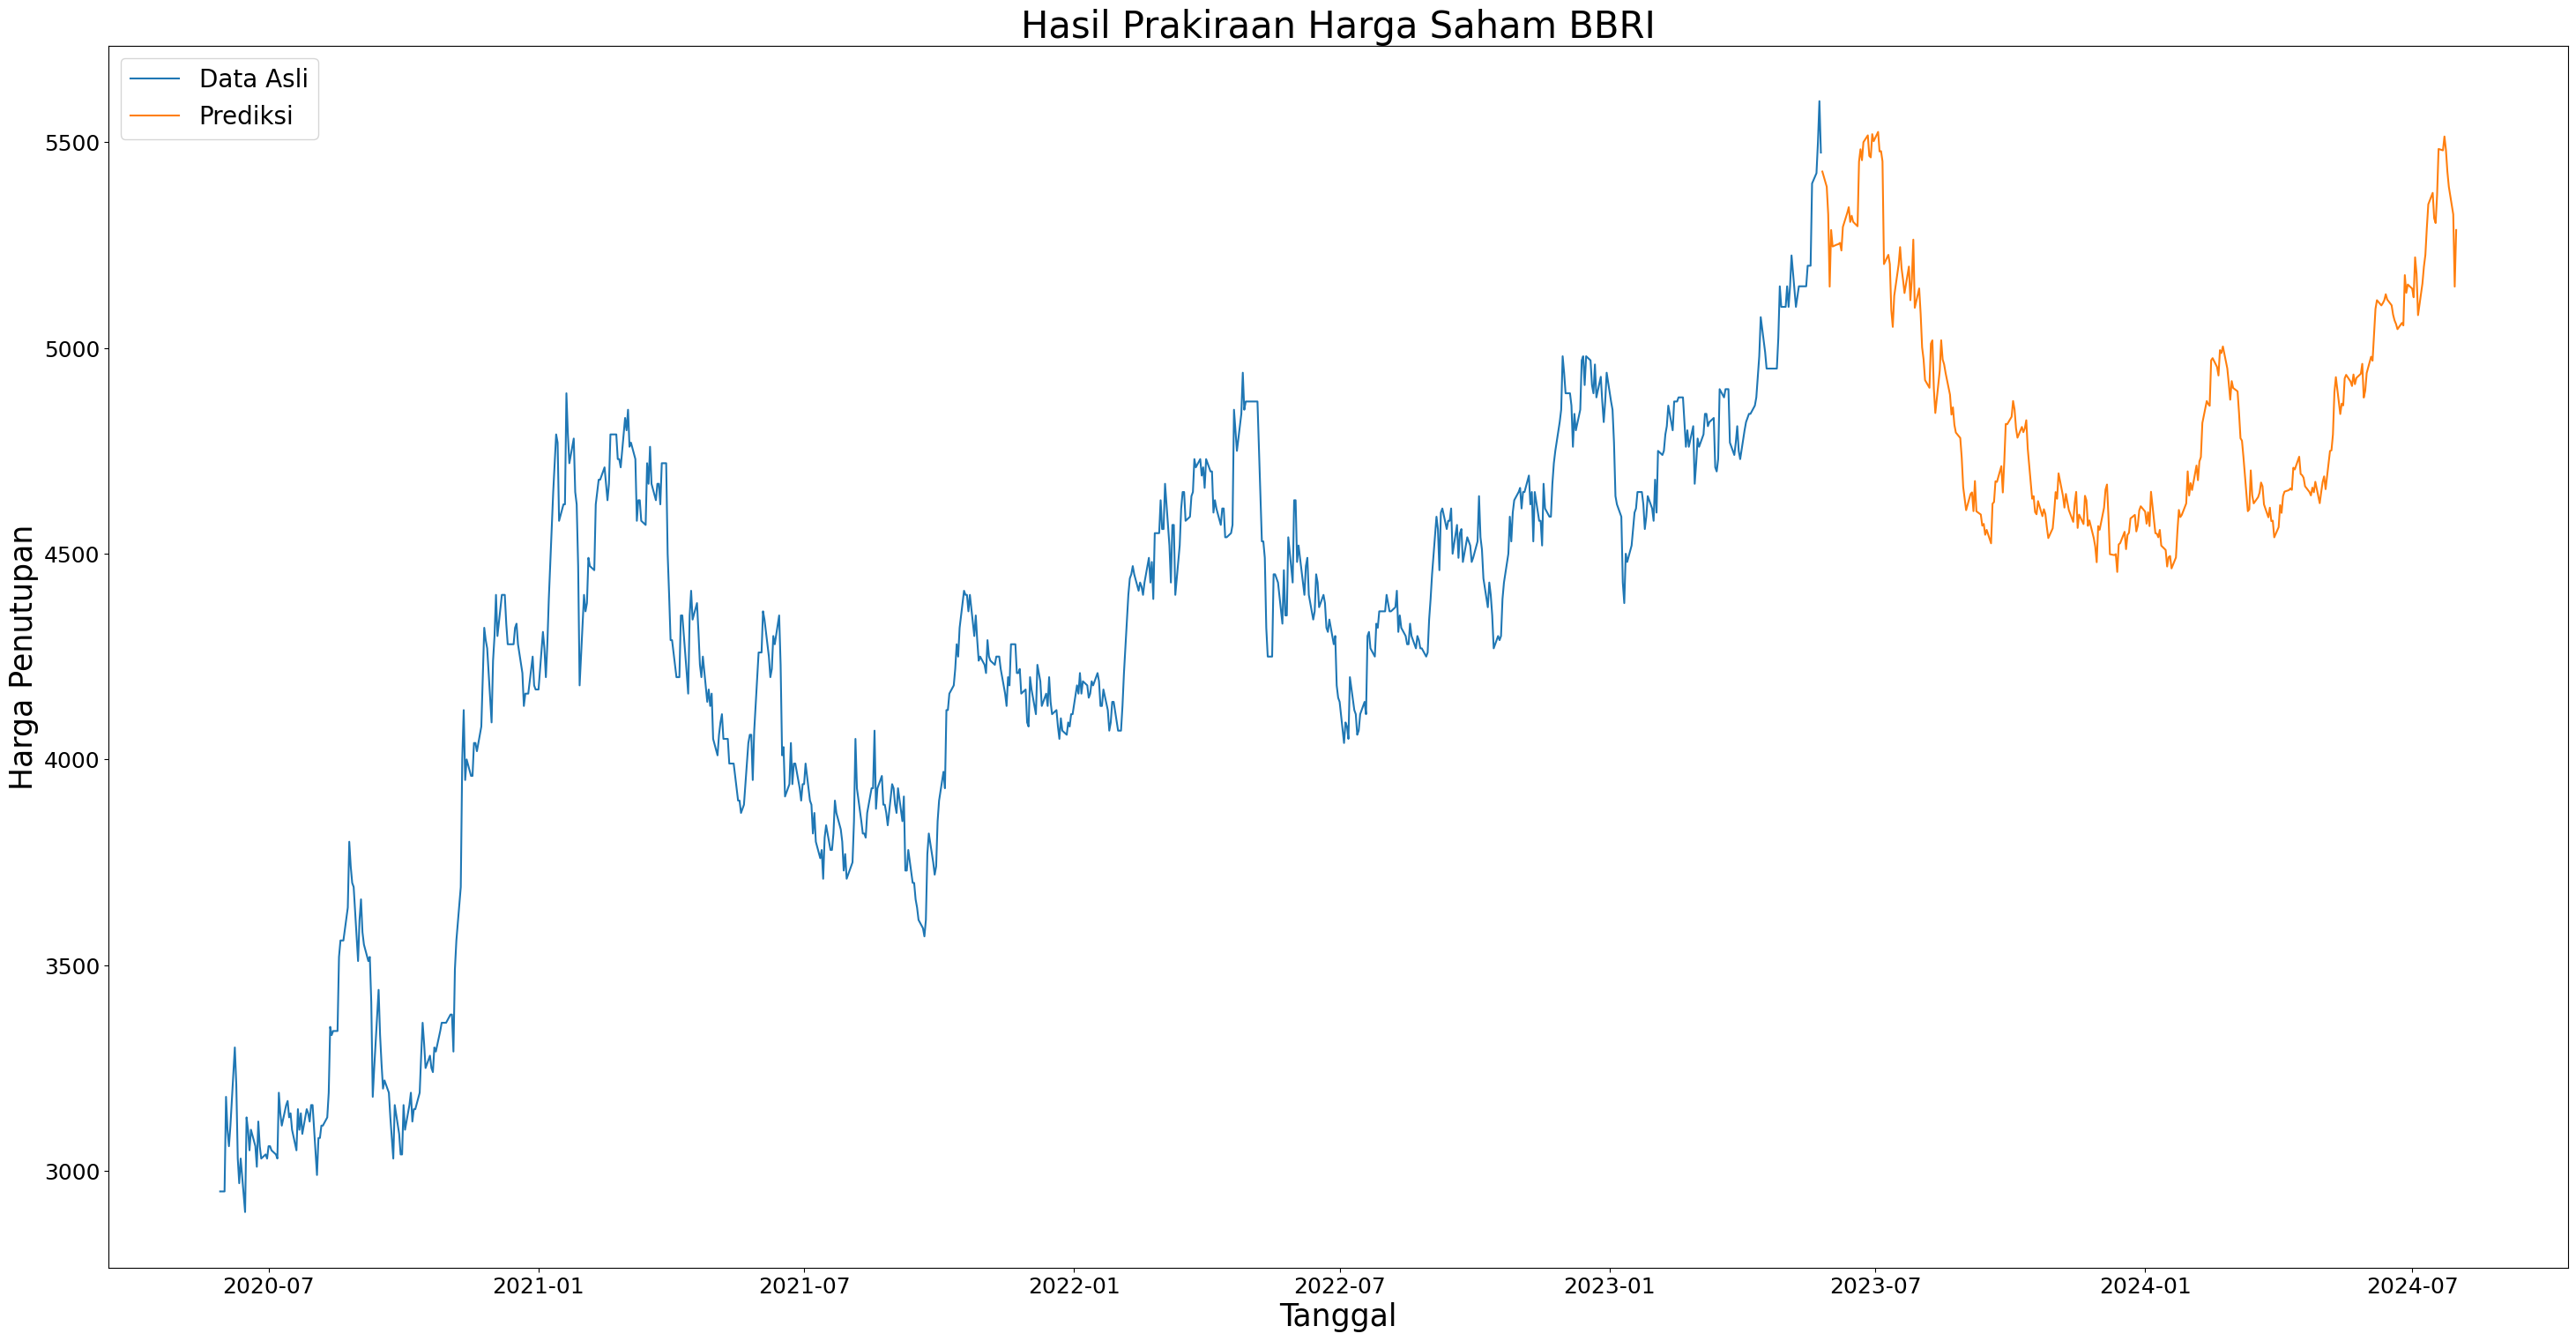

In [35]:
# Inisialisasi variabel untuk menyimpan hasil terbaik
alpha = 0.3
beta = 0.1
gamma = 0.1
seasonal_period = 304

# Prediksi akan dimulai dari tanggal 2023-05-25
start_date = '2023-05-26'

# Buat DataFrame tanggal prediksi
tanggal_prediksi = pd.date_range(start=start_date, end='2024-07-31', freq='B')

model = ExponentialSmoothing(df['close'], seasonal='add', seasonal_periods=seasonal_period)
model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Buat prediksi untuk tanggal yang diminta
prediksi = model_fit.forecast(len(tanggal_prediksi))

# Tampilkan hasil prediksi
plt.figure(figsize=(36, 18))
plt.plot(df.index, df['close'], label='Data Asli')
plt.plot(tanggal_prediksi, prediksi, label='Prediksi')
plt.title(f'Hasil Prakiraan Harga Saham BBRI', fontsize=30)
plt.xlabel('Tanggal', fontsize=25)  # Label x-axis dengan ukuran font 20
plt.ylabel('Harga Penutupan', fontsize=25)  # Label y-axis dengan ukuran font 20
# Mengubah ukuran font pada label legenda menjadi 20
plt.legend(fontsize=20)

# Mengubah ukuran poin pada sumbu x dan y
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()  # Tampilkan plot


In [36]:
import pickle

In [37]:
with open('prakiraan_sahamBBRI.sav', 'wb') as model_file:
        pickle.dump(model_fit, model_file)